# In this file i shall be performing simple linear regression using stats model and sklearn library

importing lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

loading data

In [2]:
# it is a real estate file which include size of the property and its value

In [3]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


splitting dependent and independent variables

In [5]:
y = data['price']
x1 = data['size']

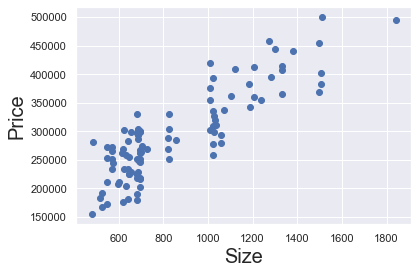

In [6]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [7]:
x = sm.add_constant(x1)
x


,const,size
0,1.0,643.09
1,1.0,656.22
2,1.0,487.29
3,1.0,1504.75
4,1.0,1275.46
...,...,...
95,1.0,549.80
96,1.0,1037.44
97,1.0,1504.75
98,1.0,648.29


fitting our data

In [8]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           8.13e-31
Time:                        21:08:54   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#plotting our prediction line

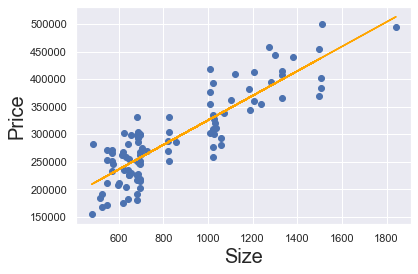

In [10]:

plt.scatter(x1,y)
yhat = x1*223.1787+101900 # we just put the coefficient of x1 and bias from previous summary table
fig = plt.plot(x1,yhat, c='orange')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

In [11]:
# simple_linear_regression_using_sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# We start by loading the data
df = pd.read_csv('Simple linear regression.csv')

# Let's explore the top 5 rows of the df
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [14]:
# This file contain sat score at time of admission and gpa obtained by the student

In [17]:
# There is a single independent variable: 'SAT'
x = df['SAT']

# and a single depended variable: 'GPA'
y = df['GPA']

In [18]:
y.shape

(84,)

In [19]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we have more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

In [20]:
# We start by creating a linear regression object
reg = LinearRegression()

In [21]:
#fitting our data into the model
reg.fit(x_matrix,y)

LinearRegression()

In [22]:
# To get the R-squared in sklearn we must call the appropriate method as we can't create summary like we did earlier
reg.score(x_matrix,y)

0.40600391479679765

In [23]:
# Getting the coefficients of the regression
reg.coef_

array([0.00165569])

In [24]:
# Getting the intercept of the regression
reg.intercept_

0.2750402996602803

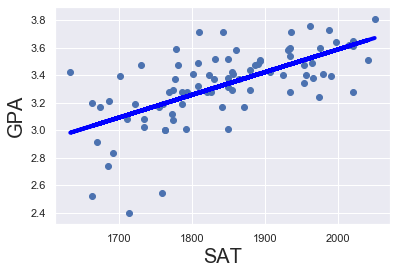

In [25]:
# plotting prediction line
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='blue')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [26]:
# we can even predict for random value
new_data = pd.DataFrame(data=[1740,1960,2021],columns=['SAT'])
new_data

,SAT
0,1740
1,1960
2,2021


In [27]:
predictions = reg.predict(new_data)
predictions

array([3.15593751, 3.52018888, 3.62118585])

In [28]:
new_data['Predicted_GPA'] = predictions
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1960,3.520189
2,2021,3.621186
